## <a href="https://pydicom.github.io">PyDICOM<a>

DICOM (Digital Image and Communications in Medicine) é uma linguagem padrão de sistemas médicos.

In [ ]:
%pip install pydicom

Note: you may need to restart the kernel to use updated packages.


### Leitura 
(Obs: nos arquivos do novo envio os arquivos estão sem extensão .dcm, acrescentei manualmente em uns para teste)

In [68]:
import pydicom
from pydicom.data import get_testdata_files
from IPython.display import IFrame

In [69]:
# filename = get_testdata_files("./DICOMDIR.dcm")
ds = pydicom.dcmread("I8000000")
ds

/home/duque/Área de Trabalho/SegColageno/ortopedia-env/lib/python3.9/site-packages/pydicom/valuerep.py:290: UserWarning: The value length (30) exceeds the maximum length of 16 allowed for VR SH.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 164
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113704.7.1.0.2441591511295131.1682607780.492
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113704.7.0.2
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'SECONDARY', 'OTHER']
(0008, 0012) Instance Creation Date              DA: '20230427'
(0008, 0013) Instance Creation Time              TM: '120300'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113704.7.1.0.2441591511295131.16826077

In [70]:
print(ds.PatientName ,f"\nRetorna o valor type(ds.PatientName): {type(ds.PatientName)}\n\n" ,
      ds[0x10, 0x10], f"\nRetorna um pydicom.DataElement type(ds[0x10, 0x10]): {type(ds[0x10, 0x10])}\n\n",
      ds[0x10,0x10].value, f"\nRetorna o valor type(ds[0x10,0x10].value): {type(ds[0x10,0x10].value)}")

ADRIANA LEITE FILGUEIRAS 
Retorna o valor type(ds.PatientName): <class 'pydicom.valuerep.PersonName'>

 (0010, 0010) Patient's Name                      PN: 'ADRIANA LEITE FILGUEIRAS' 
Retorna um pydicom.DataElement type(ds[0x10, 0x10]): <class 'pydicom.dataelem.DataElement'>

 ADRIANA LEITE FILGUEIRAS 
Retorna o valor type(ds[0x10,0x10].value): <class 'pydicom.valuerep.PersonName'>


In [75]:
# Palavras chaves para acesso:
ds.dir()

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionMatrix',
 'AcquisitionNumber',
 'AcquisitionTime',
 'AdditionalPatientHistory',
 'AdmissionID',
 'AnatomicRegionSequence',
 'AngioFlag',
 'BeatRejectionFlag',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'CardiacNumberOfImages',
 'Columns',
 'ConfidentialityCode',
 'ContentDate',
 'ContentTime',
 'DeviceSerialNumber',
 'EchoNumbers',
 'EchoTime',
 'EchoTrainLength',
 'FlipAngle',
 'FrameOfReferenceUID',
 'HeartRate',
 'HighBit',
 'IconImageSequence',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'ImagedNucleus',
 'ImagesInAcquisition',
 'ImagingFrequency',
 'InPlanePhaseEncodingDirection',
 'InStackPositionNumber',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceNumber',
 'InstitutionName',
 'IssuerOfPatientID',
 'LargestImagePixelValue',
 'Laterality',
 'MRAcquisitionType',
 'MagneticFieldStrength',
 'Manufacturer',
 'ManufacturerModelName',
 'ModalitiesInStudy',
 'Modality',
 'NumberOfAve

#### DICOMDIR

In [79]:
url = "https://pydicom.github.io/pydicom/dev/tutorials/filesets.html"
IFrame(url, width=1000, height=600)

In [81]:
dicomdir= pydicom.dcmread("DICOMDIR")
dicomdir.DirectoryRecordSequence[0]

(0004, 1400) Offset of the Next Directory Record UL: 0
(0004, 1410) Record In-use Flag                  US: 65535
(0004, 1420) Offset of Referenced Lower-Level Di UL: 500
(0004, 1430) Directory Record Type               CS: 'PATIENT'
(0010, 0010) Patient's Name                      PN: 'ADRIANA LEITE FILGUEIRAS'
(0010, 0020) Patient ID                          LO: '06822231'
(0010, 0021) Issuer of Patient ID                LO: ''
(0010, 0030) Patient's Birth Date                DA: '19711201'
(0010, 0040) Patient's Sex                       CS: 'F'

In [86]:
from pydicom.fileset import FileSet

In [88]:
fileset = FileSet(dicomdir)
print(fileset)

DICOM File-set
  Root directory: /home/duque/Área de Trabalho/SegColageno
  File-set ID: (no value available)
  File-set UID: 1.2.840.113704.7.1.0.2441591511295131.1682607780.1000493
  Descriptor file ID: (no value available)
  Descriptor file character set: (no value available)

  Managed instances:
    PATIENT: PatientID='06822231', PatientName='ADRIANA LEITE FILGUEIRAS'
      STUDY: StudyDate=20220924, StudyTime=115410, StudyDescription='RM TORNOZELO DIREITO'
        SERIES: Modality=MR, SeriesNumber=5
          IMAGE: 1 SOP Instance


/home/duque/Área de Trabalho/SegColageno/ortopedia-env/lib/python3.9/site-packages/pydicom/fileset.py:1714: UserWarning: The referenced SOP Instance for the directory record at offset 1198 does not exist: /home/duque/Área de Trabalho/SegColageno/QZR3G1MA/4IJS05Y4/I8000000
  warnings.warn(


#### Acessando dados de pixels

In [49]:
# Dados brutos de pixels
ds.PixelData

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

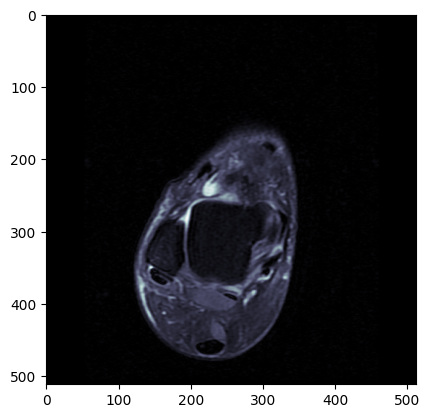

In [54]:
# Dados em forma de numpy.ndarray:
import matplotlib.pyplot as plt
data = ds.pixel_array
plt.imshow(data, cmap=plt.cm.bone); plt.show()